# Exercise 1

## Library Imports

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.feature_selection import chi2, SelectKBest
from pathlib import Path
import matplotlib.pyplot as plt

## Load CSV File

In [16]:
data_path = Path(r'.\data.csv')
df = pd.read_csv(data_path, sep=";")

In [17]:
df["label"].unique()

array(['income', 'living', 'private', 'standardOfLiving', 'leisure',
       'finance'], dtype=object)

### Data Preperation/Cleaning

In [18]:
display(df.dtypes)

Unnamed: 0                             int64
Auftragskonto                        float64
Buchungstag                           object
Valutadatum                           object
Buchungstext                          object
Verwendungszweck                      object
Beguenstigter/Zahlungspflichtiger     object
Kontonummer                           object
BLZ                                   object
Betrag                                object
Waehrung                              object
label                                 object
dtype: object

In [19]:
df["Auftragskonto"] = df["Auftragskonto"].astype(str)

df["Betrag"] = df["Betrag"].astype(str)
df["Betrag"] = df["Betrag"].apply(lambda x: x.replace(",", "."))
df["Betrag"] = df["Betrag"].astype(float)

df["Kontonummer"] = df["Kontonummer"].astype(str)
df["BLZ"] = df["BLZ"].astype(str)

## Feature Computation

1. Auftragskonto: {String}: Bag Of Words Integer Feature Count
2. Buchungstag: {String}: Bag Of Words Integer Feature Count
3. Valutadatum: {String}: copy of Buchungstag -> drop
4. Buchungstext: {String}: Bag Of Words Integer Feature Count
5. Verwendungszweck: {String}: Bag Of Words Integer Feature Count
6. Beguenstigter/Zahlungspflichtiger: {String}: Bag Of Words Integer Feature Count
7. Kontonummer:  Keep them as ID(string): Bag Of Words Integer Feature Count
8. BLZ: Keep them as ID(String): Bag Of Words Integer Feature Count
9. Betrag: {float}:
10. Waehrung: {EUR}: always same value -> drop

### Bag of Words Features

In [20]:
y = df["label"]
X = df.drop("label", axis=1)

In [21]:
def concat_BOW_features(df, use_all, use_which=None):
    if use_which is not None and use_all is False:
        return X[use_which]
 
    return df["Auftragskonto"] + " , " + df["Buchungstag"] + " , " +df["Buchungstext"]+ " , "+df["Verwendungszweck"]+ " , "+df["Beguenstigter/Zahlungspflichtiger"]+ " , "+df["Kontonummer"]+ " , "+df["BLZ"]  

X = concat_BOW_features(X, True)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [24]:
print(clf.score(X_test, y_test))

0.9433962264150944


In [25]:
report = classification_report(y_test, predictions)
print(report)

                  precision    recall  f1-score   support

         finance       1.00      1.00      1.00        11
          income       1.00      1.00      1.00         5
         leisure       0.88      1.00      0.94        15
          living       1.00      1.00      1.00         2
         private       0.86      1.00      0.92         6
standardOfLiving       1.00      0.79      0.88        14

        accuracy                           0.94        53
       macro avg       0.96      0.96      0.96        53
    weighted avg       0.95      0.94      0.94        53



[[11  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  2  0  1 11]]


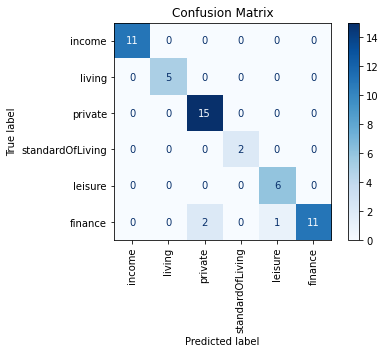

In [26]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=df["label"].unique(),
                                 cmap=plt.cm.Blues, 
                            xticks_rotation='vertical')
disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

In [27]:
selection = SelectKBest(chi2, k=15).fit(X_train, y_train)
mask = selection.get_support()
params = selection.scores_
feature_names = vectorizer.get_feature_names()

features = list()
for m, name, p in zip(mask, feature_names, params):
    if m:
        features.append((name, p))
        
features = sorted(features, key=lambda k:k[1])
features = features[::-1]

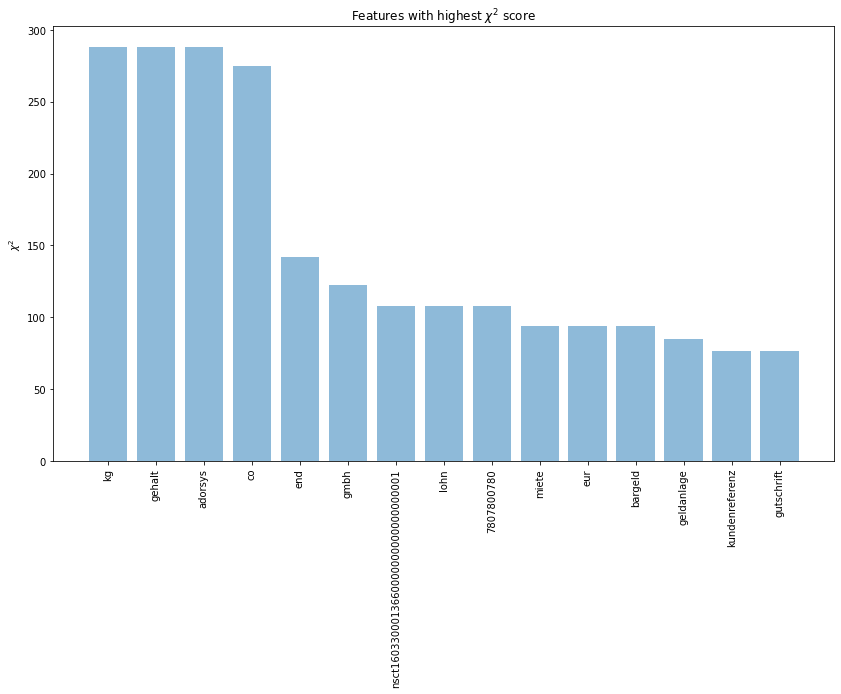

In [28]:
objects = list(map(lambda x: x[0], features))
y_pos = np.arange(len(objects))
performance = list(map(lambda x: x[1], features))

plt.figure(figsize=(14,8))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('$\chi^2$')
plt.title('Features with highest $\chi^2$ score')

plt.show()